# New York City Taxis Tips

On s'intéresse ici à la prédiction du montant de pourboires (tips) payé pour des courses de taxi à New-York. On dispose d'un jeu de données d'entraînement représentant 100 000 courses de taxis effectuées en janvier 2024 pour lesquelles le montant des pourboires est connu.

In [18]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab 
import seaborn as sns

# I. Les données

Les données d'entraînement et de test sont stockées dans le dossier ./data/ dans les fichiers train.csv et test.csv. Ces données sont ensuite chargées dans les DataFrames train_df et test_df.

In [4]:
import os

_REP_PATH_ = os.getcwd()

In [9]:
# Initialisation des DataFrames contenant les données

# DataFrame des données d'entrainement
train_df = pd.read_csv(_REP_PATH_+'/data/train.csv', index_col = 0)

# DataFrame des données de test
test_df = pd.read_csv(_REP_PATH_+'/data/test.csv', index_col = 0)


# Affichage des premiers individus des DataFrames
train_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon
0,1,2024-01-15 20:37:28,2024-01-15 20:56:43,1.0,3.30,1.0,N,1,19.1,3.5,0.5,4.80,0.0,1.0,2.5,0.0,40.734576,-74.002875,40.768615,-73.965635
1,2,2024-01-25 19:41:24,2024-01-25 19:44:42,1.0,0.72,1.0,N,1,5.8,2.5,0.5,2.46,0.0,1.0,2.5,0.0,40.768615,-73.965635,40.780436,-73.957012
2,2,2024-01-25 15:48:48,2024-01-25 16:24:23,2.0,7.45,1.0,N,1,38.7,0.0,0.5,3.00,0.0,1.0,2.5,0.0,40.717773,-74.007880,40.780436,-73.957012
3,2,2024-01-27 00:47:26,2024-01-27 00:55:55,1.0,1.53,1.0,N,1,10.0,1.0,0.5,2.25,0.0,1.0,2.5,0.0,40.720889,-73.996919,40.747746,-73.978492
4,2,2024-01-28 13:14:26,2024-01-28 13:22:34,1.0,1.53,1.0,N,1,10.0,0.0,0.5,3.50,0.0,1.0,2.5,0.0,40.768615,-73.965635,40.747746,-73.978492


## Données d'entraînement vs données test

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627163 entries, 0 to 2627162
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   payment_type           int64         
 8   fare_amount            float64       
 9   extra                  float64       
 10  mta_tax                float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  congestion_surcharge   float64       
 14  Airport_fee            float64       
 15  PU_location_lat        float64       
 16  PU_location_lon        float64       
 17  DO_location_lat        float64       
 18  DO_location_lon       

In [13]:
train_df.describe() - test_df.describe()

,Airport_fee,DO_location_lat,DO_location_lon,PU_location_lat,PU_location_lon,RatecodeID,VendorID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,tip_amount,tolls_amount,trip_distance
count,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,NaN,-2.527163e+06,-2.527163e+06
mean,-1.683047e-03,6.649990e-07,1.322962e-05,7.895556e-05,-1.425363e-04,-2.287472e-02,2.163494e-04,2.124726e-03,-1.234212e-02,-4.554352e-02,-2.573317e-05,-1.529911e-04,-4.003920e-03,1.208485e-03,NaN,1.882941e-03,-1.144276e-02
std,-2.583026e-03,-6.199025e-05,9.511550e-05,3.874467e-05,-1.847739e-04,-1.158735e-01,-1.292599e-04,-3.697207e-03,-1.151490e-02,-1.049573e-01,1.110404e-03,7.520157e-04,-3.131846e-03,2.146457e-03,NaN,2.925993e-03,-1.194245e-02
min,0.000000e+00,3.194477e-03,4.585618e-02,1.782656e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
max,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.562997e-02,0.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+00,-6.052000e+02,0.000000e+00,-3.500000e+00,-2.000000e+00,0.000000e+00,NaN,-4.620000e+01,-2.636000e+01


On note que les données d'entraînement et de test concernent le même mois. 

Les écart-types et moyennes sont proche pour les jeux de données, avec un écart inférieur à 0.1 pour chacune des variables.

## Correlation

In [20]:
correlation_matrix = train_df.drop(columns= ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']).corr()

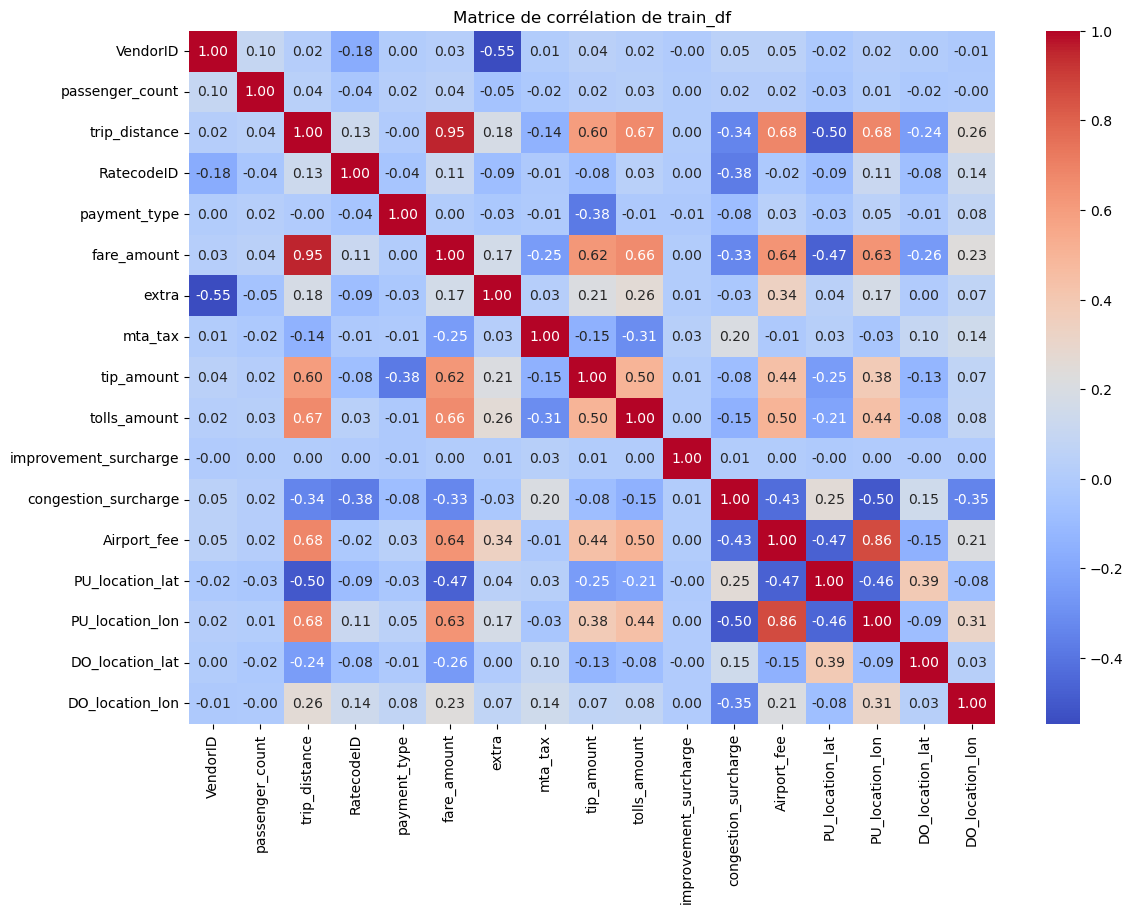

In [22]:


# Création de la heatmap
matplotlib.pylab.figure(figsize=(13,9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Afficher le graphique
plt.title("Matrice de corrélation de train_df")
plt.show()

On observe une forte corrélation entre les variables `trip_distance` et `fare_amount`. Cela était prévisible puisque les trajets plus longs coûtent plus cher. Nous allons tout de même conserver ces deux variables dans la suite. Les variables `PU_location_lon` et `Airport_fee` sont aussi fortement corrélées, ce qui confirme que la taxe d'aéroport concerne la localisation du départ de la course.